# SPACEDOS 02 Spectra visualisation

In [235]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import string
import os
import glob
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets

In [260]:
fto = ['/storage/experiments/2020/1204_ABSJets/AIRDOS/98',
'/storage/experiments/2020/1204_ABSJets/AIRDOS/DD',
'/storage/experiments/2020/1204_ABSJets/AIRDOS_C/9C',
'/storage/experiments/2020/1204_ABSJets/SPACEDOS/64',
'/storage/experiments/2021/01_SPACEDOS_511/Na22',
'/storage/experiments/2021/01_SPACEDOS_511/Na22_2',
'/storage/experiments/2021/01_SPACEDOS_511/Cs137'
      ]
    
w = widgets.Select(
    options=fto,
    rows=len(fto),
    layout={'width': 'max-content'},
    description='File:',
    disabled=False
)

display(w)


Select(description='File:', layout=Layout(width='max-content'), options=('/storage/experiments/2020/1204_ABSJe…

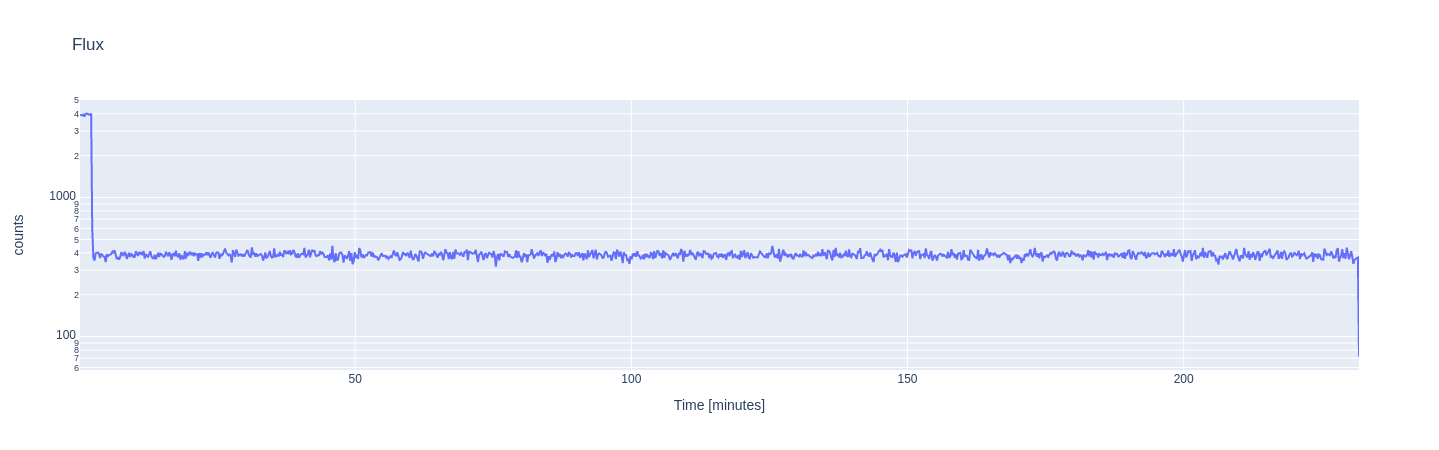

In [283]:
l=[]
l.extend(range(0,258))
df = pd.read_csv(w.value + '/DATALOG.TXT', sep=',', header=None, names=l, comment='*',engine='python' )
df = df.reset_index(drop=True)
rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)
rc = rc.apply(pd.to_numeric, errors='coerce')
rc['counts'] = rc.iloc[:,10:255].sum(axis=1)

data = [go.Scatter(x=rc[2]/60, y=rc['counts'])]
layout = go.Layout(title='Flux', yaxis=dict(title='counts', type='log'), xaxis=dict(title='Time [minutes]'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [284]:
fr = widgets.IntText(value=0, description='From Minute:', disabled=False)
to = widgets.IntText(value=100, description='To Minute:', disabled=False)

display(fr)
display(to)

IntText(value=0, description='From Minute:')

IntText(value=100, description='To Minute:')

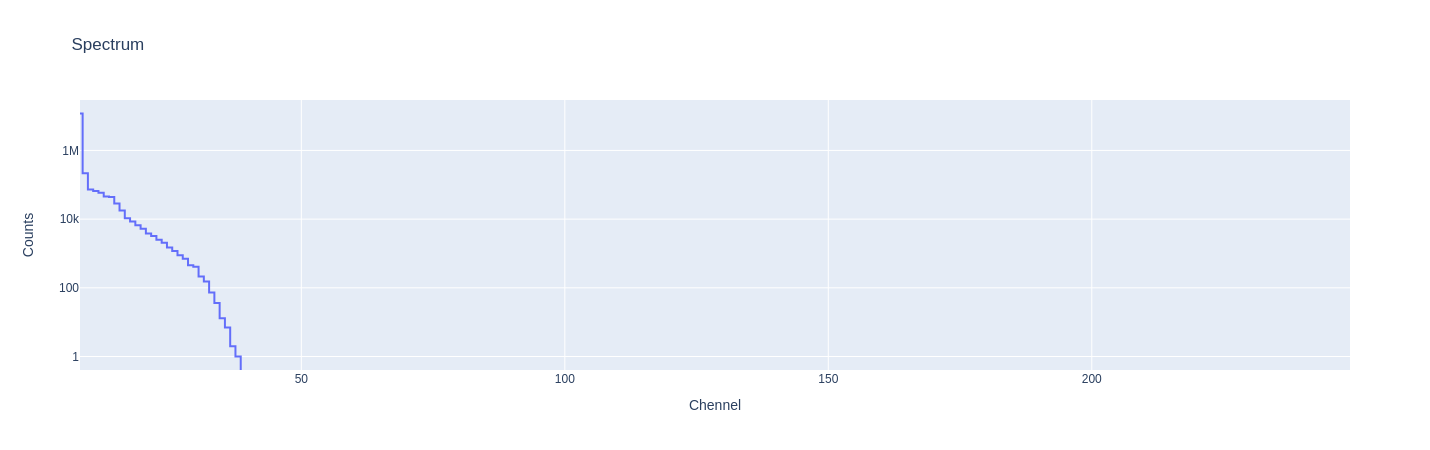

In [285]:
FROM_CHANNEL = 8
TO_CHANNEL = 250

spectrum = rc.loc[(rc[2]/60) >= fr.value].loc[(rc[2]/60) <= to.value].iloc[:,FROM_CHANNEL:TO_CHANNEL].sum()

data = [go.Scatter(x=spectrum.index, y=spectrum, line=dict(shape='hvh'))]

layout = go.Layout(title='Spectrum', yaxis=dict(title='Counts', type='log'), xaxis=dict(title='Chennel'))
#layout = go.Layout(title='Spectrum', yaxis=dict(title='Counts'), xaxis=dict(title='Chennel'))

fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
SWITCH_ON_AIRDOS = '2020-10-28 17:32:11'

rcp = rc.loc[(rc[2]/60) >= fr.value].loc[(rc[2]/60) <= to.value]

rcp['counts'] = rcp.iloc[:,18:20].sum(axis=1)
rcp['counts2'] = rcp.iloc[:,9:10].sum(axis=1)
#rcp['time'] = pd.to_datetime(rcp[2], unit='s', errors='coerce')
rcp['time'] = pd.to_datetime(pd.to_datetime(SWITCH_ON_AIRDOS) + pd.to_timedelta(rcp[2], unit='s'))
rcp.set_index(rcp['time'], inplace=True)
rcp = rcp.resample('10T').sum()



#data = [go.Scatter(x=rcp.index, y=rcp['counts'])]
#layout = go.Layout(title='Flux', yaxis=dict(title='counts', type='log'), xaxis=dict(title='CET'))
#fig = go.Figure(data=data, layout=layout)
fig = go.Figure()
fig.add_trace(go.Scatter(x=rcp.index, y=rcp['counts'],
                    mode='lines',
                    name='19'))
fig.add_trace(go.Scatter(x=rcp.index, y=rcp['counts2'],
                    mode='lines',
                    name='counts2'))
fig.show()

In [ ]:
rcp[:,8:]

# Flux x cislo mereni

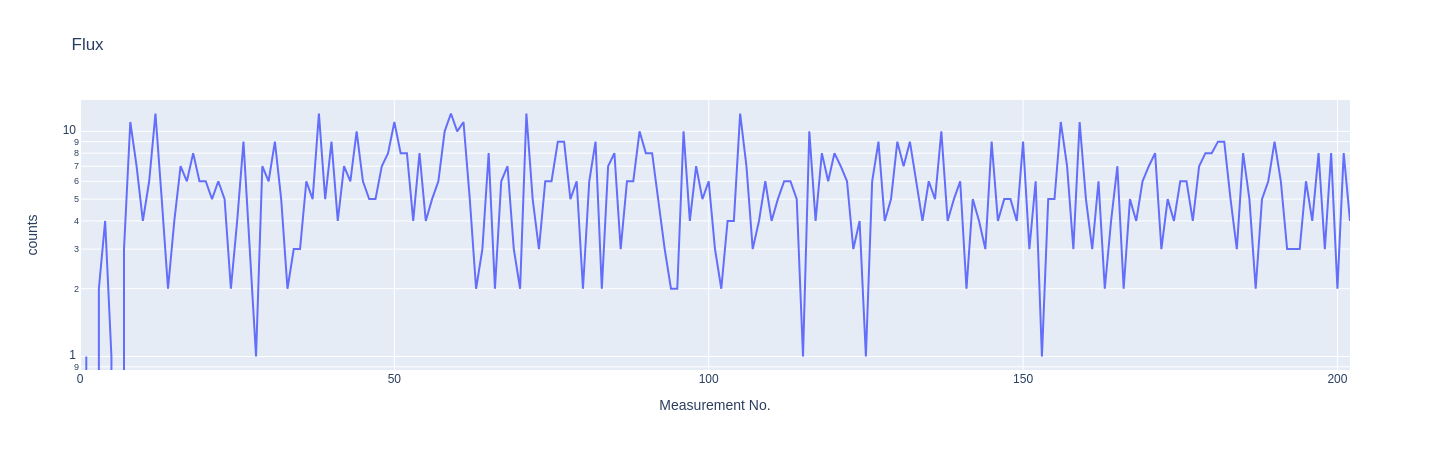

In [243]:
rcc = rc[0:]
data = [go.Scatter(x=rcc.index, y=rcc[4])]
layout = go.Layout(title='Flux', yaxis=dict(title='counts', type='log'), xaxis=dict(title='Measurement No.'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [244]:
fr = widgets.IntText(value=0, description='From Meas:', disabled=False)
to = widgets.IntText(value=100, description='To Meas:', disabled=False)

display(fr)
display(to)

IntText(value=0, description='From Meas:')

IntText(value=100, description='To Meas:')

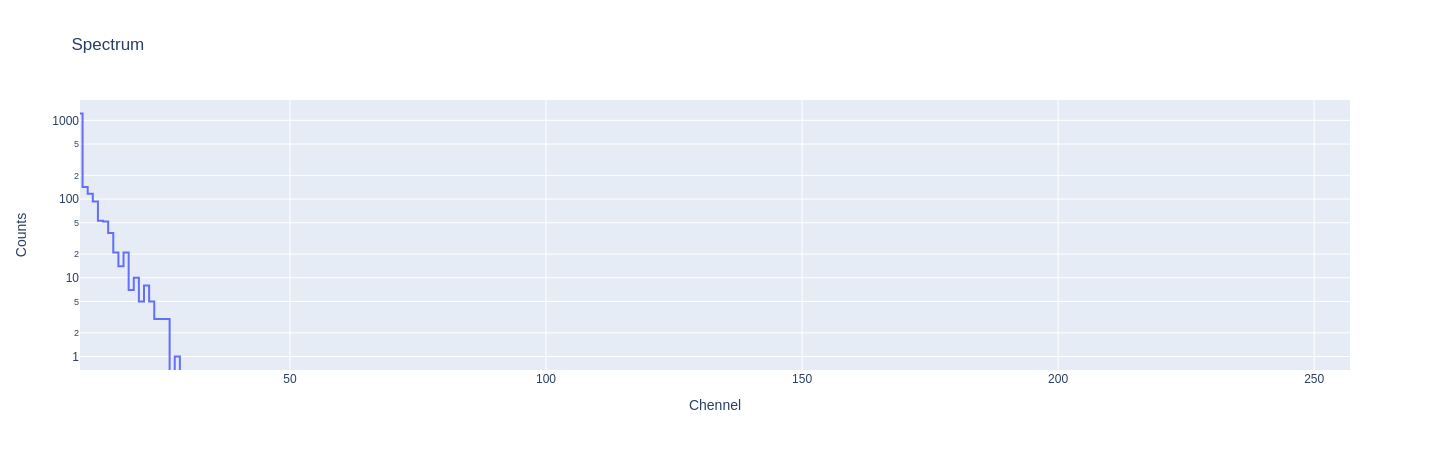

In [249]:
meas = fr.value
#spectrum = rcc.loc[meas:meas].iloc[:,9:].sum()
spectrum = rcc.loc[meas:meas+100].iloc[:,9:].sum()
#spectrum = rcc.loc[257000:259900].iloc[:,9:].sum()
#spectrum = rcc.loc[fr.value:to.value].iloc[:,9:].sum()

FROM_CHANNEL = 0
TO_CHANNEL = 250

#spectrum = rcc.loc[(rcc.index) >= fr.value].loc[(rcc.index) <= to.value].iloc[:,FROM_CHANNEL:TO_CHANNEL].sum()

data = [go.Scatter(x=spectrum.index, y=spectrum, line=dict(shape='hvh'))]

layout = go.Layout(title='Spectrum', yaxis=dict(title='Counts', type='log'), xaxis=dict(title='Chennel'))
#layout = go.Layout(title='Spectrum', yaxis=dict(title='Counts'), xaxis=dict(title='Chennel'))

fig = go.Figure(data=data, layout=layout)
fig.show()

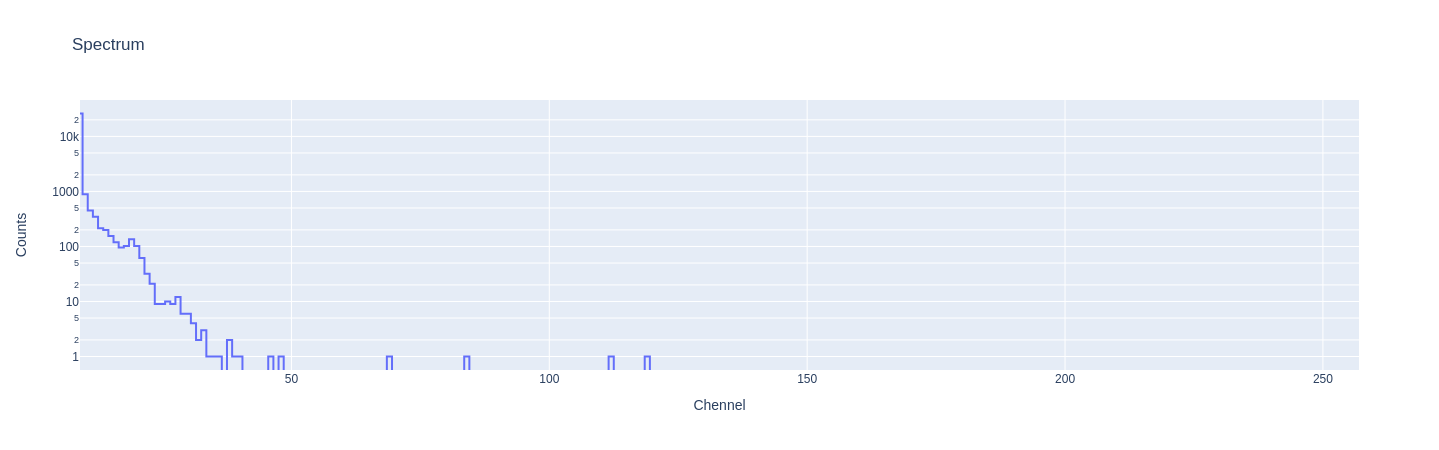

In [122]:
meas = fr.value
#spectrum = rcc.loc[meas:meas].iloc[:,9:].sum()
#spectrum = rcc.loc[meas:meas+100].iloc[:,9:].sum()
#spectrum = rcc.loc[257000:259900].iloc[:,9:].sum()
spectrum = rcc.loc[fr.value:to.value].iloc[:,9:].sum()

FROM_CHANNEL = 0
TO_CHANNEL = 250

#spectrum = rcc.loc[(rcc.index) >= fr.value].loc[(rcc.index) <= to.value].iloc[:,FROM_CHANNEL:TO_CHANNEL].sum()

data = [go.Scatter(x=spectrum.index, y=spectrum, line=dict(shape='hvh'))]

layout = go.Layout(title='Spectrum', yaxis=dict(title='Counts', type='log'), xaxis=dict(title='Chennel'))
#layout = go.Layout(title='Spectrum', yaxis=dict(title='Counts'), xaxis=dict(title='Chennel'))

fig = go.Figure(data=data, layout=layout)
fig.show()

51000
51200
51400
51600
51800
52000


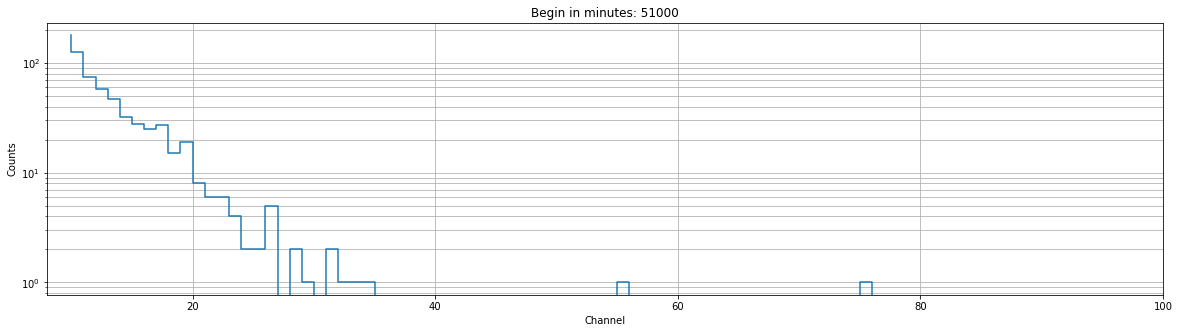

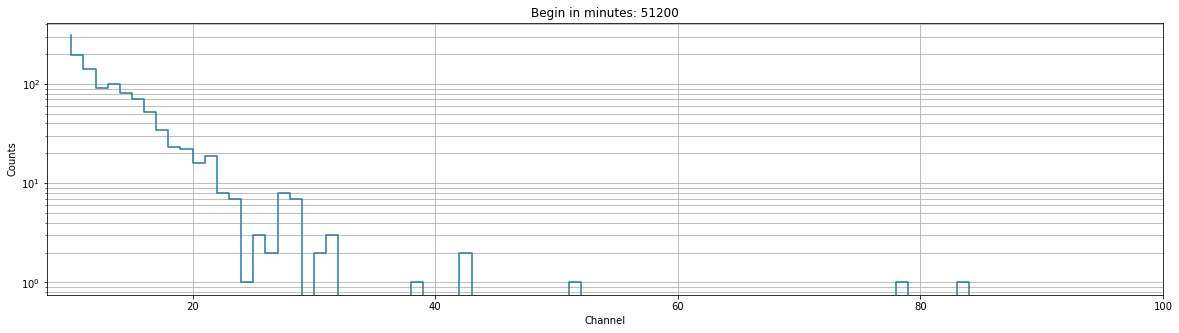

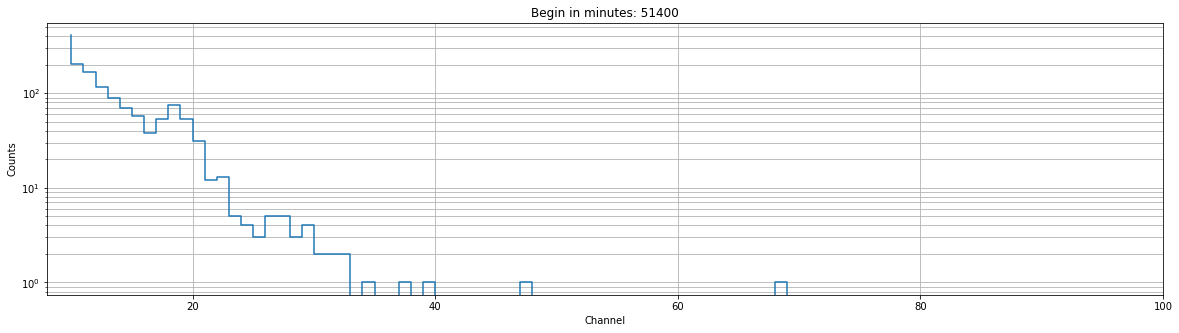

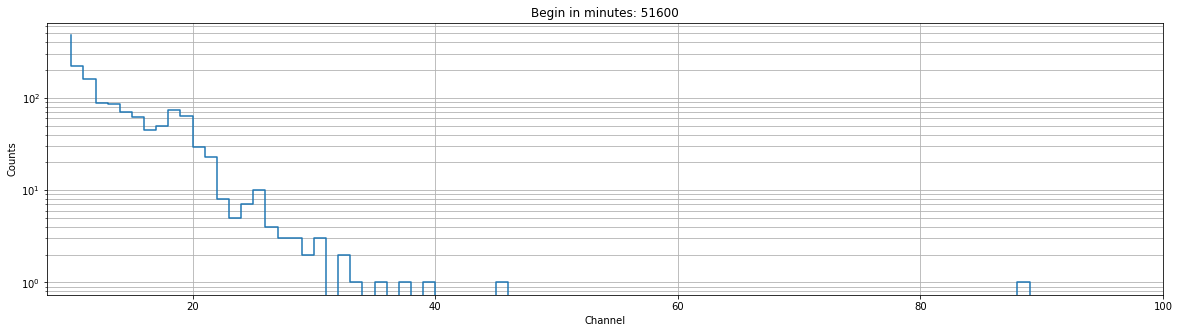

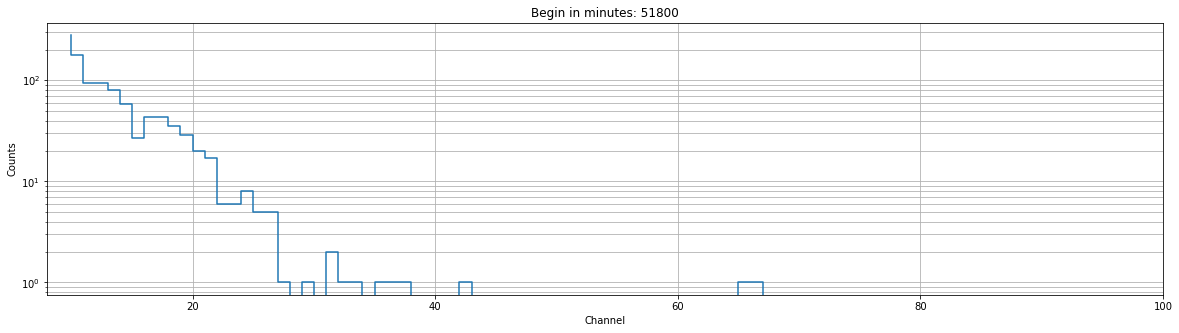

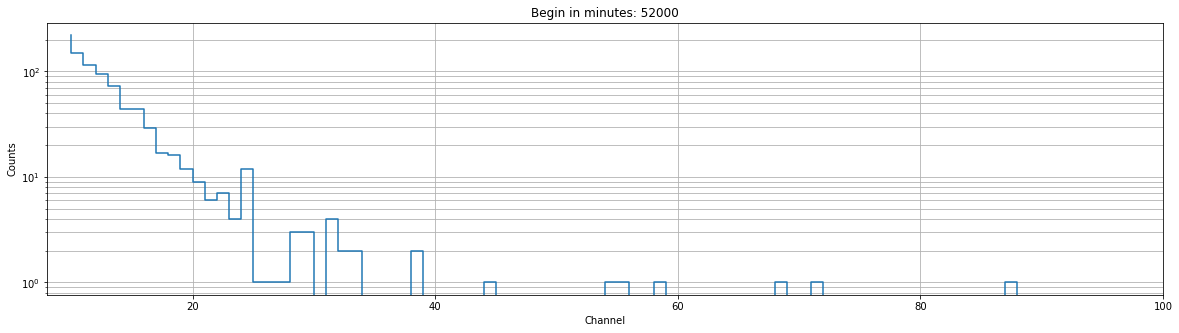

In [144]:
data = [go.Scatter(x=rc[2]/60, y=rc['counts'])]
for i in range(51000,52100,200):
    print(i)
    spectrum = rc.loc[(rc[2]/60)>=i].loc[(rc[2]/60)<=i+200].iloc[:,9:].sum()

    plt.figure(figsize=(20,5))
    plt.plot(spectrum[1:240], drawstyle='steps')
    plt.yscale('log')
    plt.xlim(8,100)
    plt.grid(which='both')
    plt.xlabel('Channel')
    plt.ylabel('Counts')
    plt.title('Begin in minutes: '+str(i))

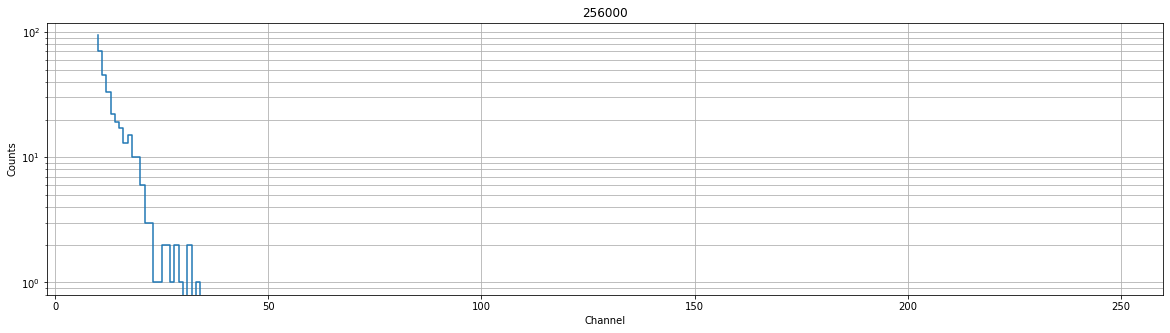

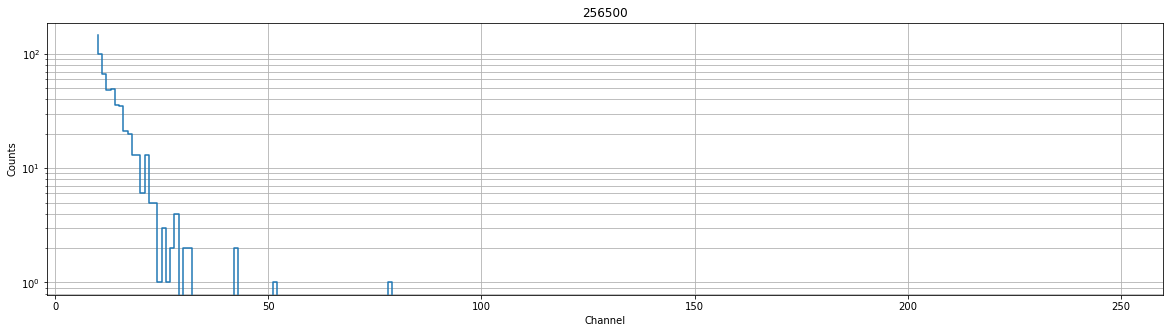

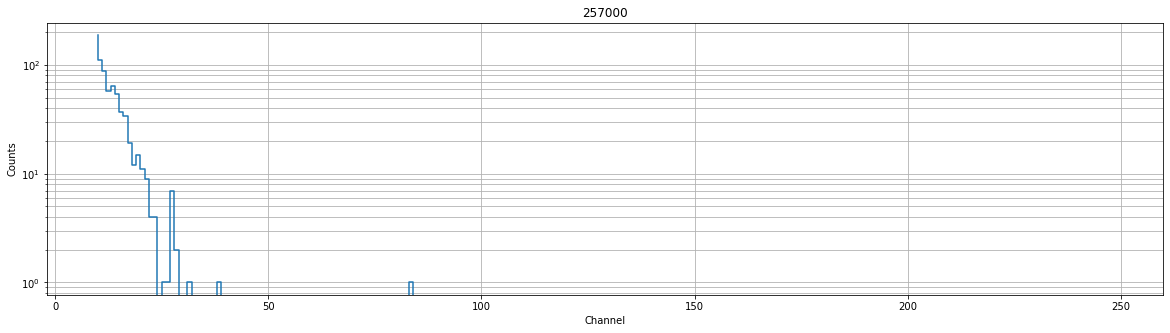

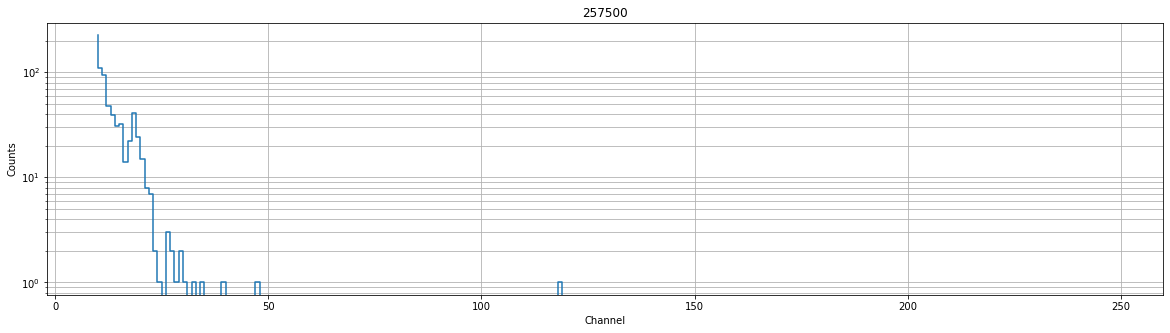

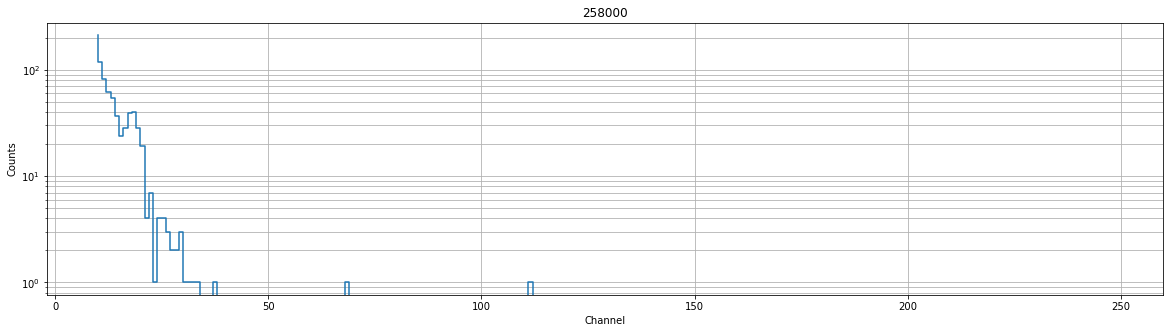

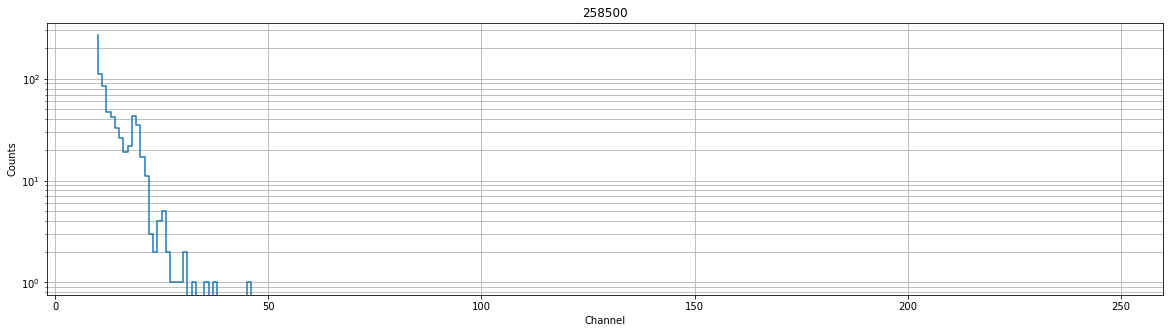

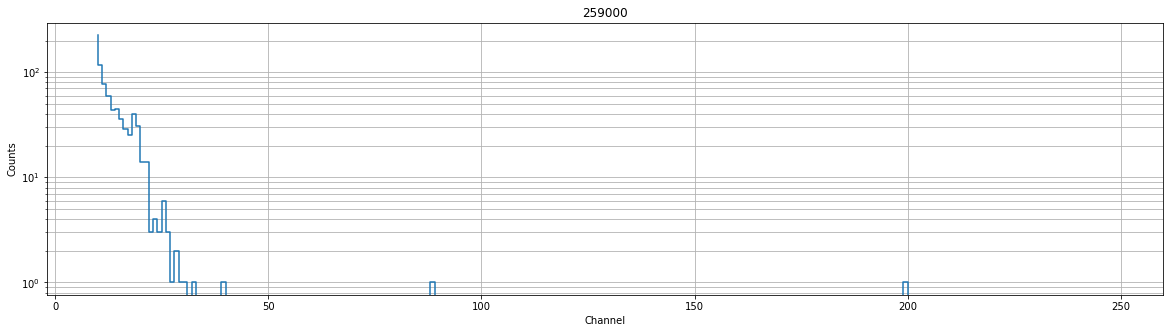

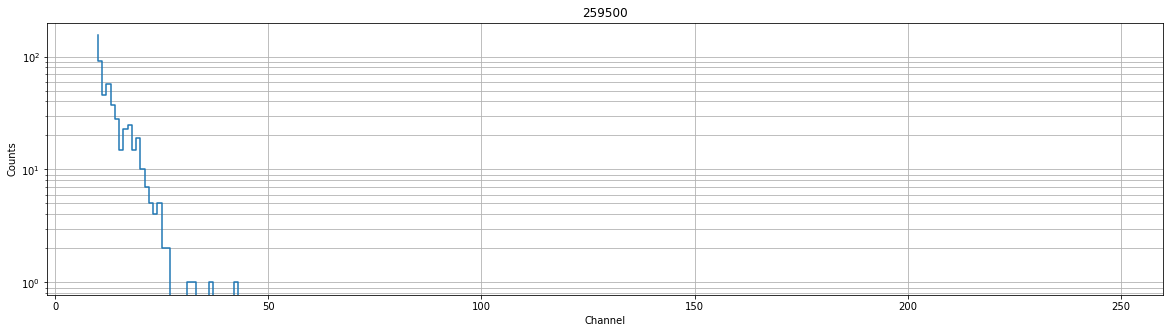

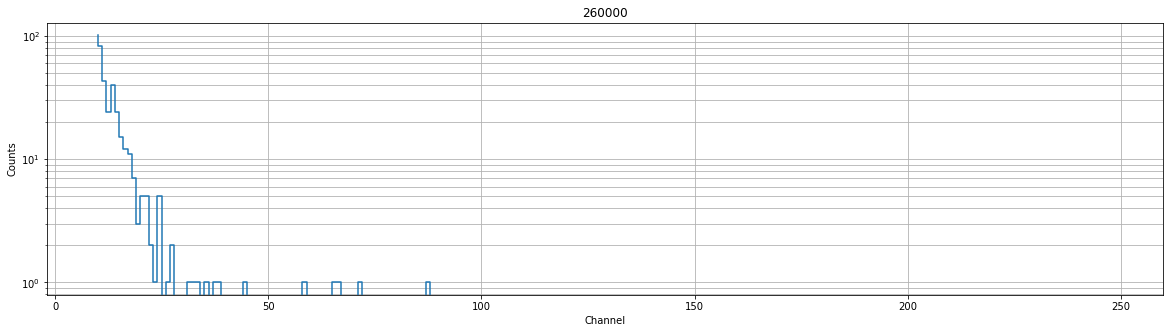

In [122]:
meas = 196025
FROM_CHANNEL = 0
TO_CHANNEL = 250

#spectrum = rcc.loc[meas:meas].iloc[:,9:].sum()
for i in range(256000,260500,500):
    spectrum = rcc.loc[i:i+500].iloc[:,9:].sum()

    plt.figure(figsize=(20,5))
    plt.plot(spectrum[1:240], drawstyle='steps')
    plt.yscale('log')
    #plt.ylim(1,1e5)
    plt.grid(which='both')
    plt.xlabel('Channel')
    plt.ylabel('Counts')
    plt.title(str(i))

Text(0.5, 1.0, '52000')

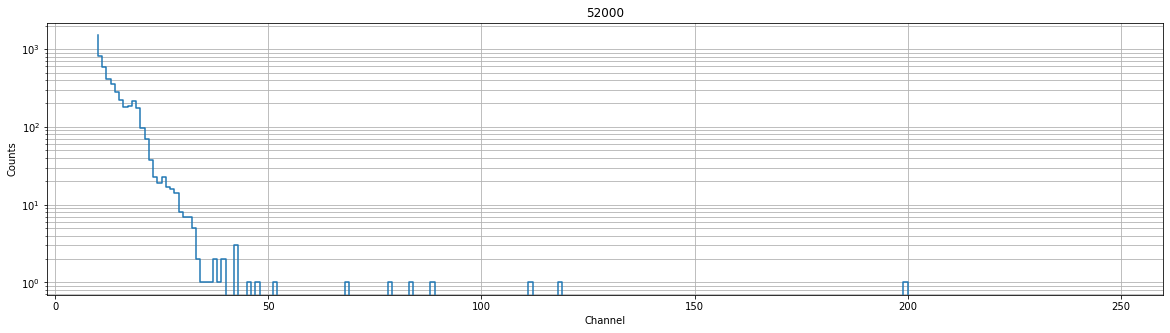

In [148]:
meas = 196025
FROM_CHANNEL = 0
TO_CHANNEL = 250

#spectrum = rcc.loc[meas:meas].iloc[:,9:].sum()
spectrum = rcc.loc[256000:260000].iloc[:,9:].sum()

plt.figure(figsize=(20,5))
plt.plot(spectrum[1:240], drawstyle='steps')
plt.yscale('log')
#plt.ylim(1,1e5)
plt.grid(which='both')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title(str(i))

Text(0.5, 1.0, 'SPACEDOS 02')

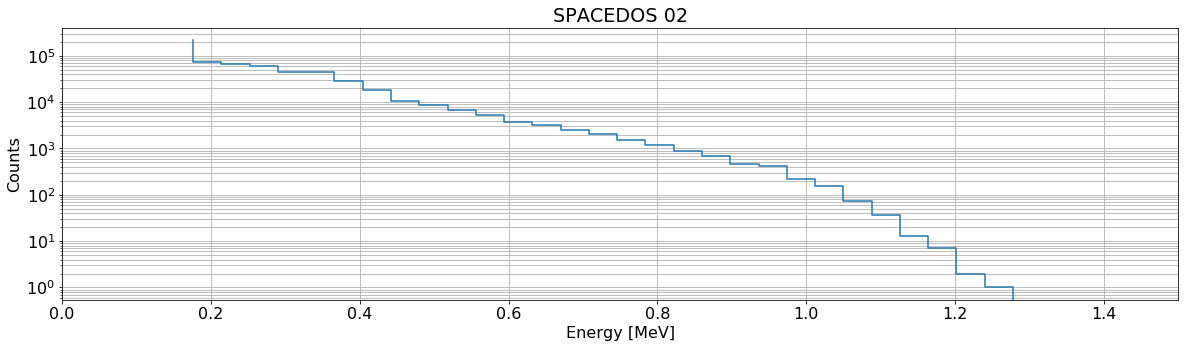

In [296]:

coef = np.array([0.,0.])
coef[1] = 0.038
coef[0] = 0.1

#spectrum = rcc.loc[257000:260000].iloc[:,9:].sum()
e = pd.DataFrame()
e['c'] = spectrum[1:240]
e['1'] = e.index
e['e'] = (e['1'].astype(float)-7) * coef[1] + coef[0]

plt.figure(figsize=(20,5))
plt.plot(e['e'],e['c'], drawstyle='steps')
plt.yscale('log')
#plt.ylim(1,1e5)
plt.xlim(0,1.5)
plt.grid(which='both')
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts')
plt.title('SPACEDOS 02')


In [290]:
e

,c,1,e
9,215918.0,9,0.062
10,72757.0,10,0.100
11,65674.0,11,0.138
12,58977.0,12,0.176
13,45809.0,13,0.214
...,...,...,...
243,0.0,243,8.954
244,0.0,244,8.992
245,0.0,245,9.030
246,0.0,246,9.068


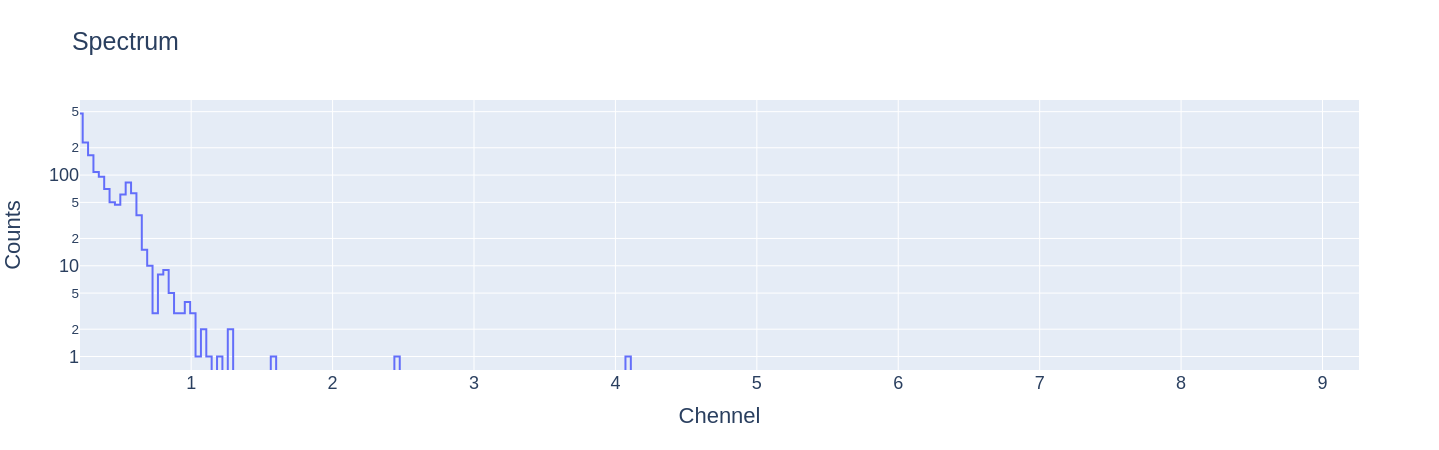

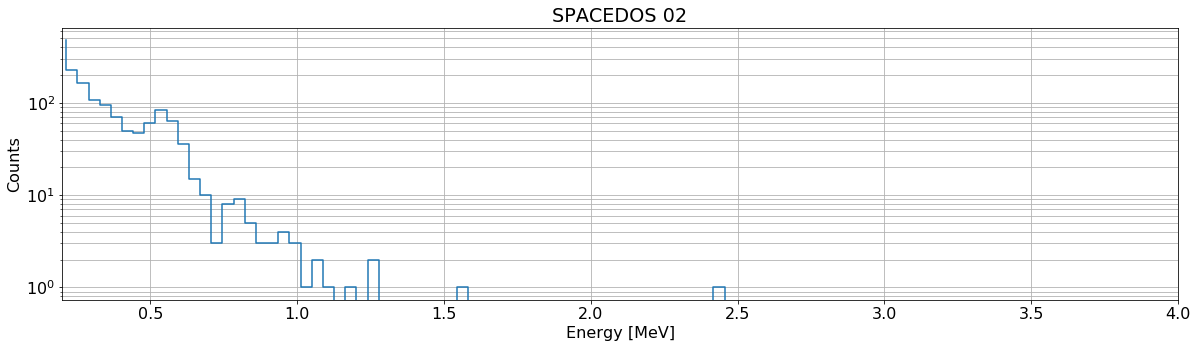

In [121]:

coef = np.array([0.,0.])
coef[1] = 0.038
coef[0] = 0.1

spectrum = rcc.loc[258000:259000].iloc[:,9:].sum()
e = pd.DataFrame()
e['c'] = spectrum[1:240]
e['1'] = e.index
e['e'] = (e['1'].astype(float) - 7) * coef[1] + coef[0]

plt.figure(figsize=(20,5))
plt.rcParams['font.size'] = '16'
plt.plot(e['e'],e['c'], drawstyle='steps')
plt.yscale('log')
#plt.ylim(1,1e5)
plt.xlim(0.2,4)
plt.grid(which='both')
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts')
plt.title('SPACEDOS 02')


data = [go.Scatter(x=e['e'], y=e['c'], line=dict(shape='hvh'))]

layout = go.Layout(title='Spectrum', yaxis=dict(title='Counts', type='log'), xaxis=dict(title='Chennel'),  font=dict(size=18), hoverlabel = dict(font=dict(size=30)))

fig = go.Figure(data=data, layout=layout)

fig.show()


Text(0.5, 1.0, 'SPACEDOS - TOKAMAK (cely den 1)')

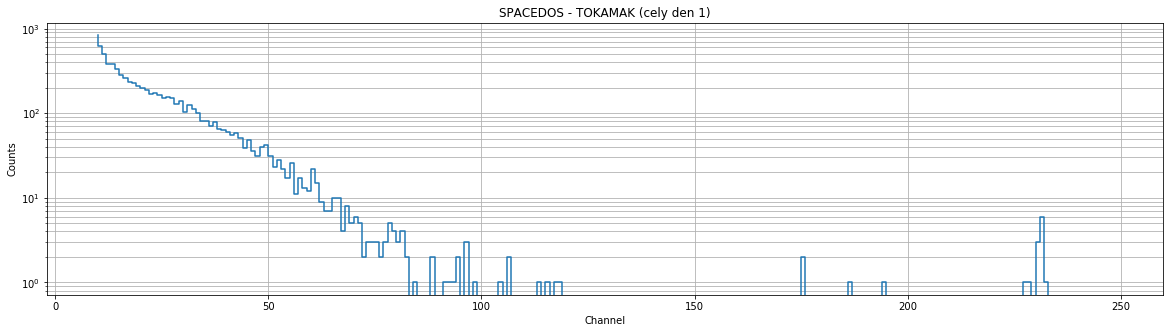

In [54]:
meas = 196025
FROM_CHANNEL = 0
TO_CHANNEL = 250

#spectrum = rcc.loc[meas:meas].iloc[:,9:].sum()
spectrum = rcc.loc[187000:190000].iloc[:,9:].sum()


plt.figure(figsize=(20,5))

plt.plot(spectrum[1:240], drawstyle='steps')
plt.yscale('log')
#plt.ylim(1,1e5)
plt.grid(which='both')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('SPACEDOS - TOKAMAK (cely den 1)')

Text(0.5, 1.0, 'SPACEDOS - TOKAMAK (cely den 2)')

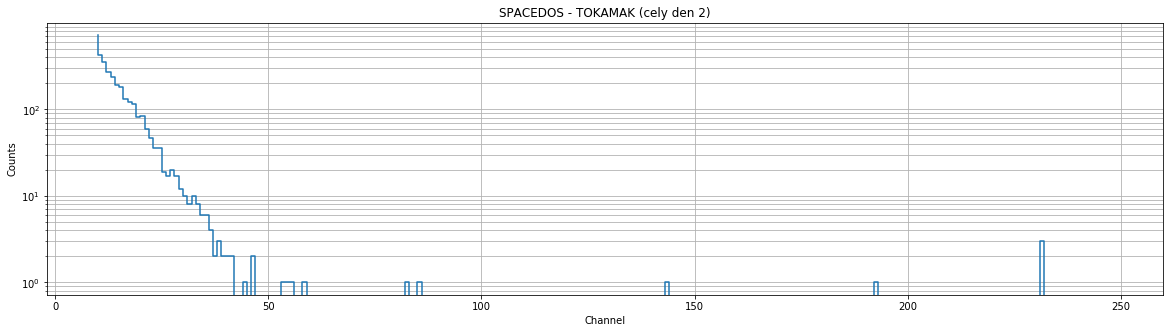

In [55]:
meas = 196025
FROM_CHANNEL = 0
TO_CHANNEL = 250

#spectrum = rcc.loc[meas:meas].iloc[:,9:].sum()
spectrum = rcc.loc[195000:197000].iloc[:,9:].sum()


plt.figure(figsize=(20,5))

plt.plot(spectrum[1:240], drawstyle='steps')
plt.yscale('log')
#plt.ylim(1,1e5)
plt.grid(which='both')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('SPACEDOS - TOKAMAK (cely den 2)')

Text(0.5, 1.0, 'SPACEDOS - TOKAMAK')

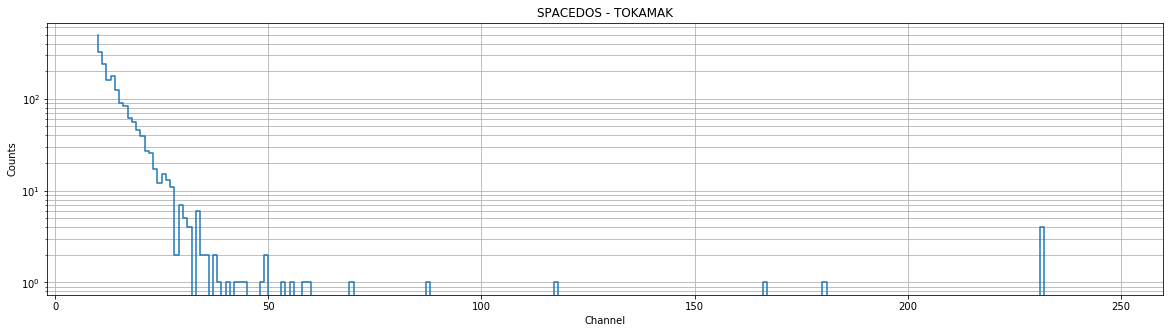

In [50]:
meas = 196025
FROM_CHANNEL = 0
TO_CHANNEL = 250

#spectrum = rcc.loc[meas:meas].iloc[:,9:].sum()
spectrum = rcc.loc[202000:204000].iloc[:,9:].sum()


plt.figure(figsize=(20,5))

plt.plot(spectrum[1:240], drawstyle='steps')
plt.yscale('log')
#plt.ylim(1,1e5)
plt.grid(which='both')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('SPACEDOS - TOKAMAK')

Text(0.5, 1.0, 'SPACEDOS - TOKAMAK (jeden vystrel)')

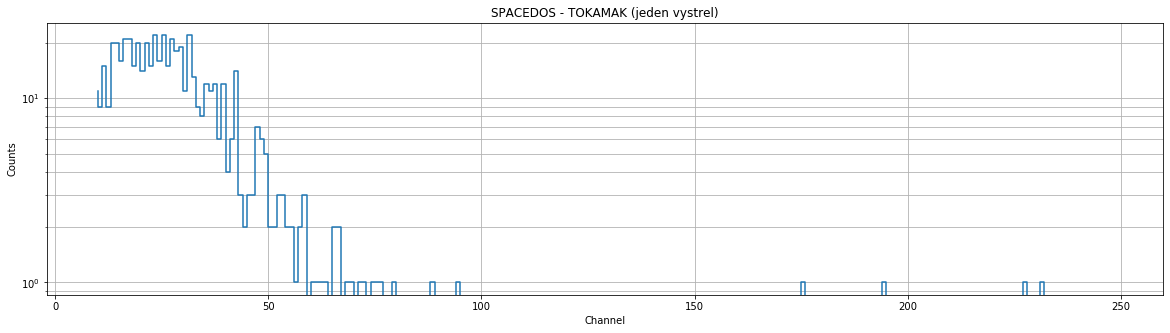

In [56]:
meas = 188673
FROM_CHANNEL = 0
TO_CHANNEL = 250

spectrum = rcc.loc[meas:meas].iloc[:,9:].sum()
#spectrum = rcc.loc[202000:204000].iloc[:,9:].sum()


plt.figure(figsize=(20,5))

plt.plot(spectrum[1:240], drawstyle='steps')
plt.yscale('log')
#plt.ylim(1,1e5)
plt.grid(which='both')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('SPACEDOS - TOKAMAK (jeden vystrel)')

Text(0.5, 1.0, 'SPACEDOS - bleskognerator (jeden blesk)')

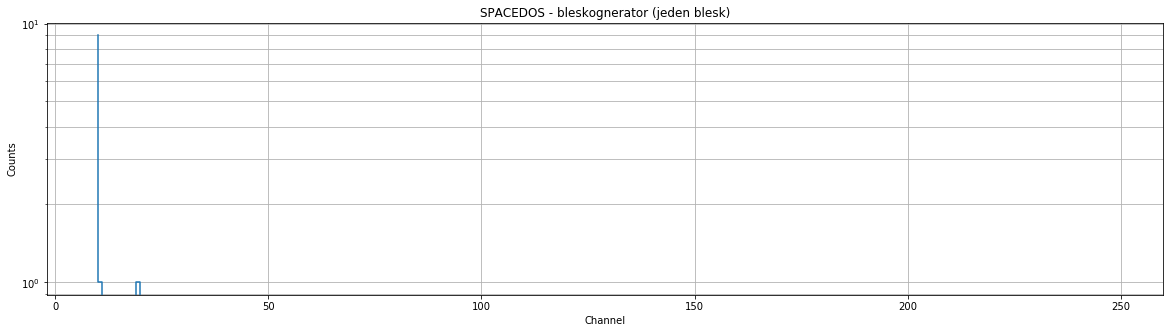

In [64]:
meas = 258682
FROM_CHANNEL = 0
TO_CHANNEL = 250

spectrum = rcc.loc[meas:meas].iloc[:,9:].sum()
#spectrum = rcc.loc[202000:204000].iloc[:,9:].sum()


plt.figure(figsize=(20,5))

plt.plot(spectrum[1:240], drawstyle='steps')
plt.yscale('log')
#plt.ylim(1,1e5)
plt.grid(which='both')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('SPACEDOS - bleskognerator (jeden blesk)')